## Моделирование NPT ансамбля

   - Система: результат выполнения ноутбука `2021-05-05_nvt_heating.ipynb`;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NPT$;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость нагревания: $v_T = 0~\varepsilon / k_B\tau$;
   - Конечное давление: $P_f = 22~\varepsilon / k_B$;
   - Термостат: MTTK;
   - Параметр термостата: $Q_T = 100.0$;
   - Параметр баростата: $Q_P = 200.0$;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $5000$;
   - Равновесные характеристики системы рассчитывалась через каждые $500$ шагов;
   - Число ансамблей $N=2000$;
   - Подсчёт состоял из $2N+499$ шагов: $500$ на уравновешивание системы при фиксированной температуре и $2N-1$ на усреднение по ансамблям (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-05-06_nve_after_nvt'
PLOT_FILENAME_POSTFIX = 'nve_after_nvt'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, CURRENT_DATA)
PATH_TO_CURRENT_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-05-06_nve_after_nvt'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\plots\\2021-05-06_nve_after_nvt'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [6]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 2.7407, 'pressure': 4.62161, 'heating_velocity': 0.0},
 {'temperature': 2.75036, 'pressure': 4.59274, 'heating_velocity': 0.0},
 {'temperature': 2.75556, 'pressure': 4.5905, 'heating_velocity': 0.0},
 {'temperature': 2.75643, 'pressure': 4.62455, 'heating_velocity': 0.0},
 {'temperature': 2.76136, 'pressure': 4.60058, 'heating_velocity': 0.0},
 {'temperature': 2.76263, 'pressure': 4.61022, 'heating_velocity': 0.0},
 {'temperature': 2.78117, 'pressure': 4.50407, 'heating_velocity': 0.0},
 {'temperature': 2.79436, 'pressure': 4.49742, 'heating_velocity': 0.0},
 {'temperature': 2.80156, 'pressure': 4.44865, 'heating_velocity': 0.0},
 {'temperature': 2.80794, 'pressure': 4.44846, 'heating_velocity': 0.0},
 {'temperature': 2.82629, 'pressure': 4.38249, 'heating_velocity': 0.0}]

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [7]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

,radius,setup_0,setup_1,setup_2,setup_3,setup_4,setup_5,setup_6,setup_7,setup_8,setup_9,setup_10
0,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
607,6.08,1.001266,1.001031,1.001085,1.001882,1.002780,1.001393,1.001758,1.002131,1.001266,1.001367,1.002834
608,6.09,1.002249,1.002203,1.001740,1.001019,1.002574,1.001330,1.001827,1.001667,1.001427,1.002719,1.001904
609,6.10,1.000659,1.001105,1.001117,1.000911,1.002500,1.000274,1.001505,1.001609,1.000657,1.001284,1.001773
610,6.11,1.001899,1.001438,1.001347,1.001333,1.001896,1.001348,1.001719,1.001831,1.001483,1.001761,1.001790


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

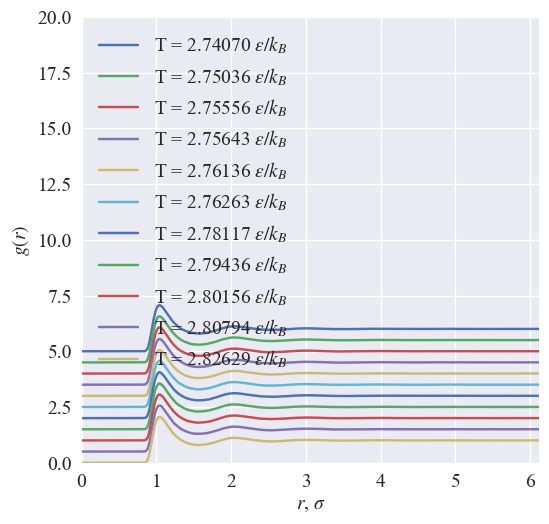

In [8]:
pp.plot_rdf(
    shift=0.5,
    left=0,
    right=6.125,
    bottom=0, 
    top=20,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

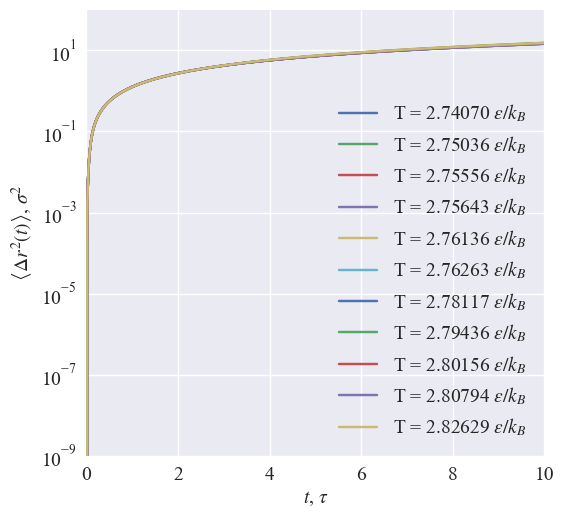

In [9]:
pp.plot_msd(
    left=0,
    right=10,
    bottom=1e-9, 
    top=1e2,
    y_scale='log',
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

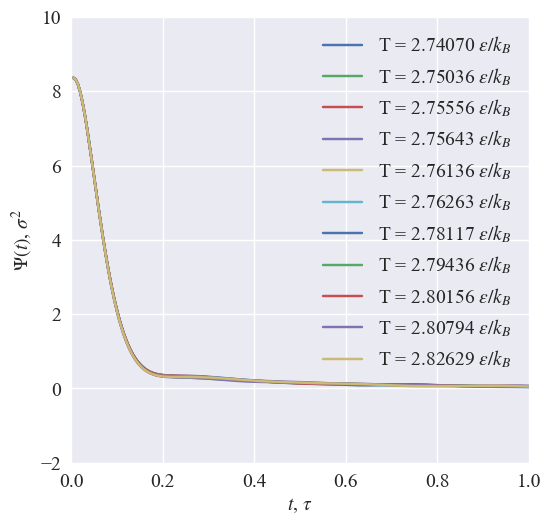

In [10]:
pp.plot_vaf(
    left=0,
    right=1,
    bottom=-2,
    top=10,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

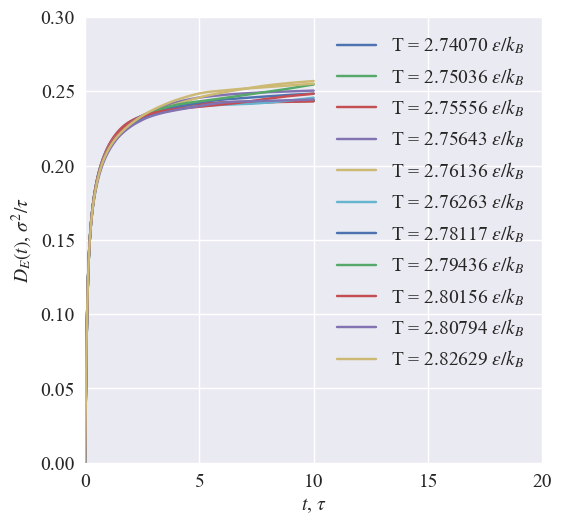

In [11]:
pp.plot_einstein_diffusion(
    left=0,
    right=20,
    bottom=0, 
    top=0.3,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

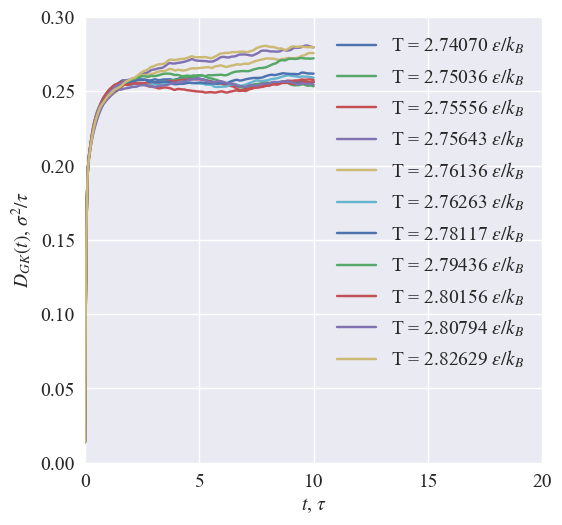

In [12]:
pp.plot_gk_diffusion(
    left=0,
    right=20,
    bottom=0, 
    top=0.3,
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

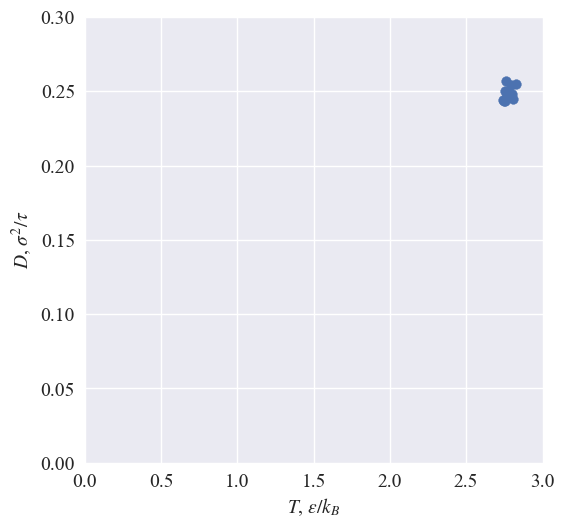

In [13]:
pp.plot_diffusion(
    left=0, 
    right=3,
    bottom=0, 
    top=0.3,
)

#### Таблица временных зависимостей характеристик системы

In [14]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,200.005,2.81225,4.44847,5778.7440,-4539.6636,1239.0806,12974.898,0.0,0.0,1838.2656
1,200.010,2.81864,4.43824,5789.8784,-4551.0723,1238.8060,12896.252,0.0,0.0,1838.2656
2,200.015,2.82265,4.43392,5794.8926,-4555.9980,1238.8945,12862.401,0.0,0.0,1838.2656
3,200.020,2.82356,4.43406,5795.5063,-4556.2266,1239.2800,12861.907,0.0,0.0,1838.2656
4,200.025,2.82352,4.43466,5796.3896,-4556.9688,1239.4207,12863.442,0.0,0.0,1838.2656
...,...,...,...,...,...,...,...,...,...,...
4995,224.980,2.78985,4.58341,5713.0310,-4472.7437,1240.2871,13850.528,0.0,0.0,1838.2656
4996,224.985,2.77719,4.60594,5691.1000,-4450.4795,1240.6207,14018.639,0.0,0.0,1838.2656
4997,224.990,2.76901,4.61796,5679.5103,-4439.1997,1240.3107,14108.073,0.0,0.0,1838.2656
4998,224.995,2.76602,4.62224,5675.7417,-4435.9673,1239.7744,14139.248,0.0,0.0,1838.2656


#### Зависимость объёма системы от времени

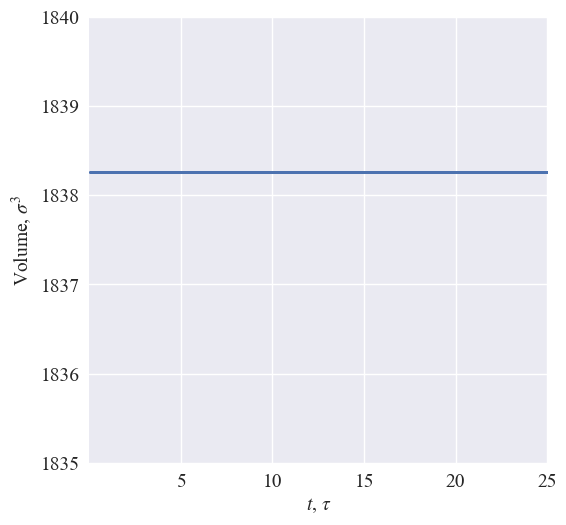

In [15]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
    bottom=1835,
    top=1840,
);

#### Зависимость температуры системы от времени

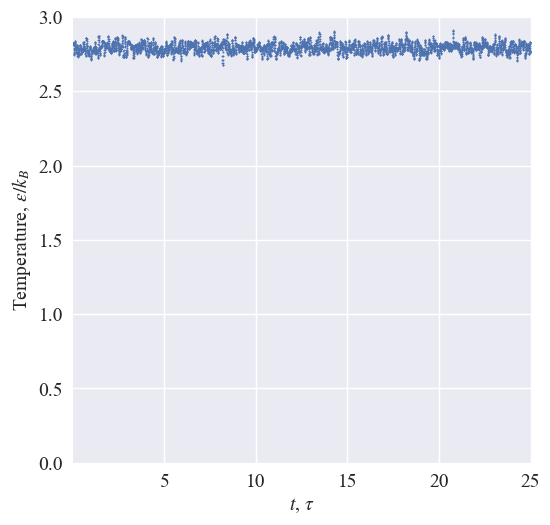

In [16]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
    bottom=0,
    top=3,
);

#### Зависимость давления системы от времени

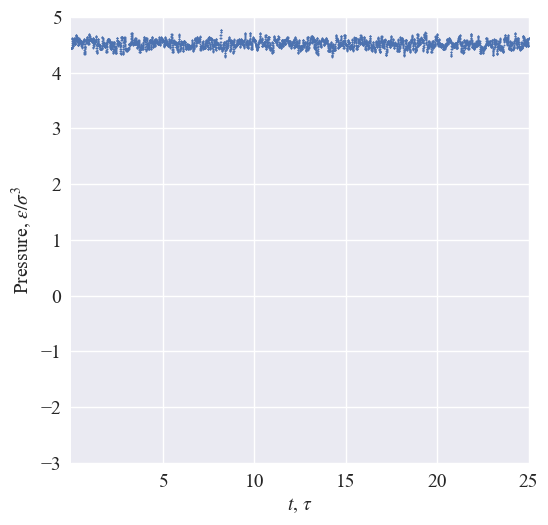

In [17]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
    bottom=-3,
    top=5,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

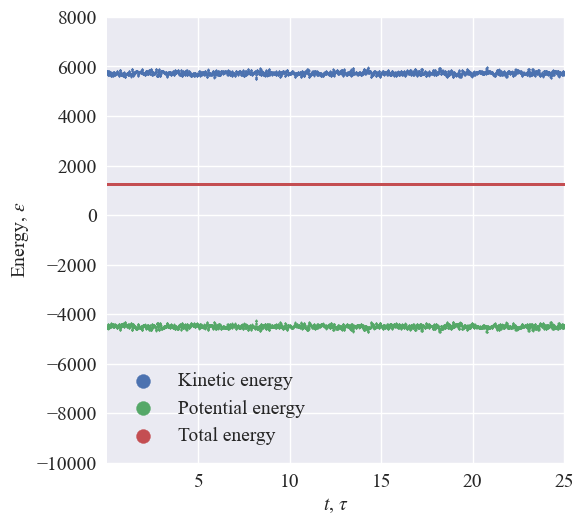

In [18]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
    bottom=-10000,
    top=8000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [19]:
pp.get_enthalpy();
pp.get_entropy();
pp.get_free_energy();
pp.get_gibbs_energy();

#### Зависимость энтропии системы от времени

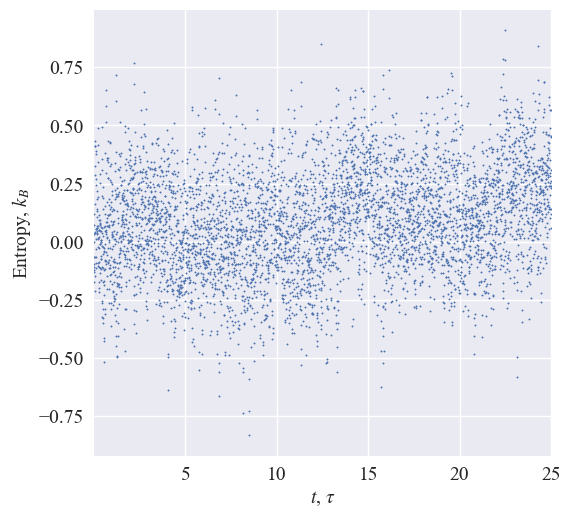

In [20]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
#     bottom=-2,
#     top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

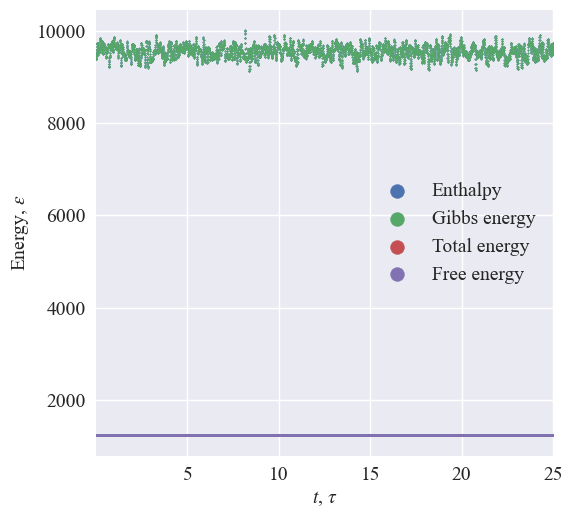

In [21]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
#     bottom=100,
#     top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

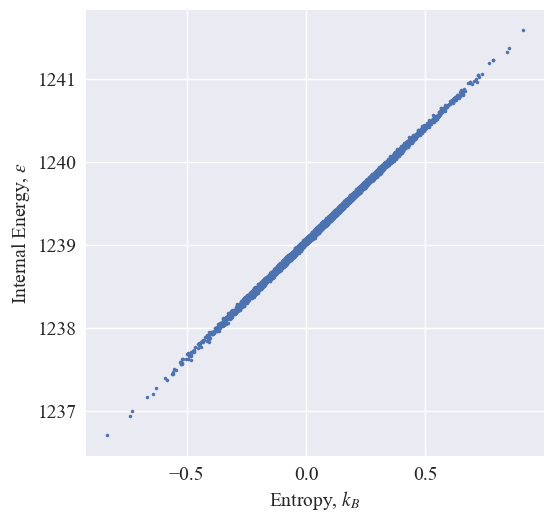

In [22]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=5);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

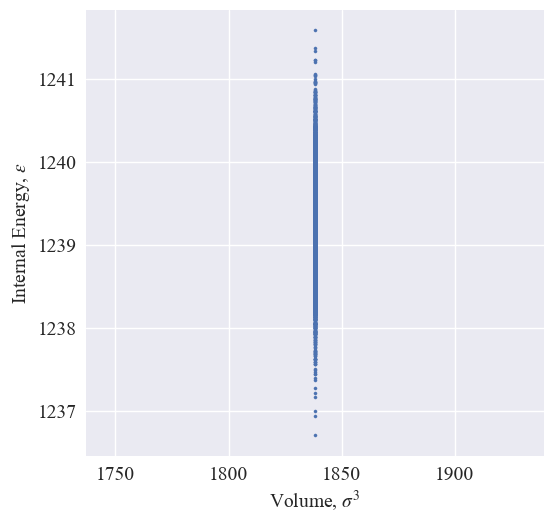

In [23]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=5);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

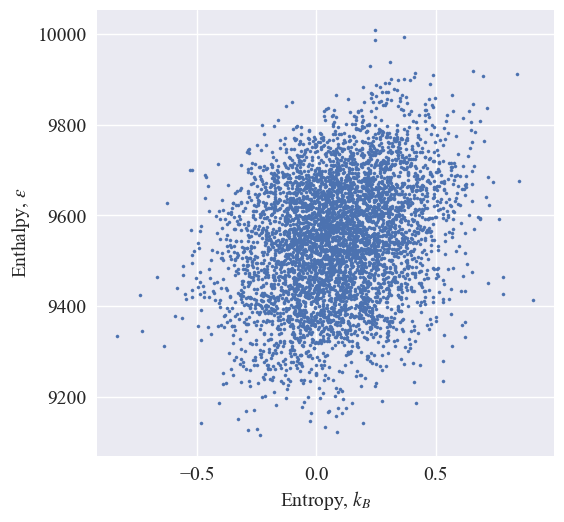

In [24]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=5);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

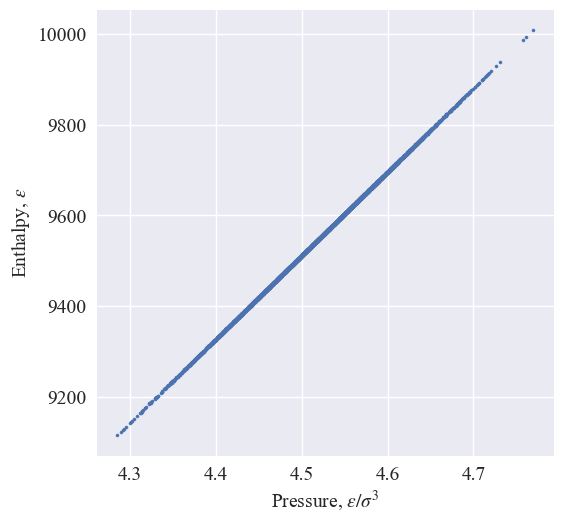

In [25]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

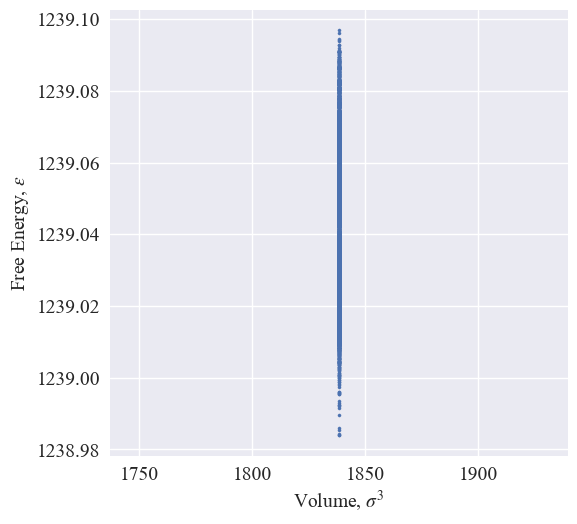

In [26]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=5);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

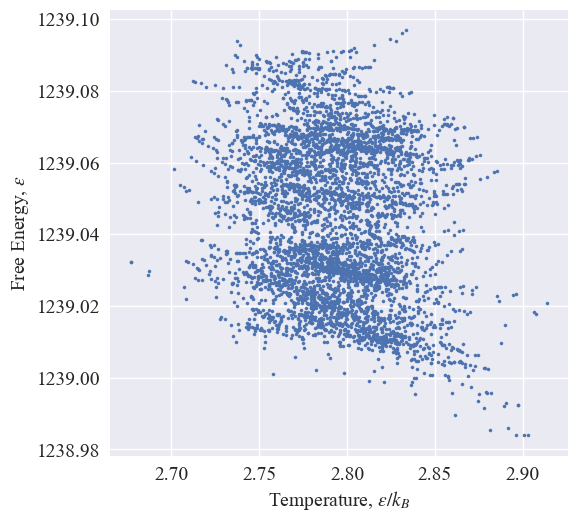

In [27]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=5);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

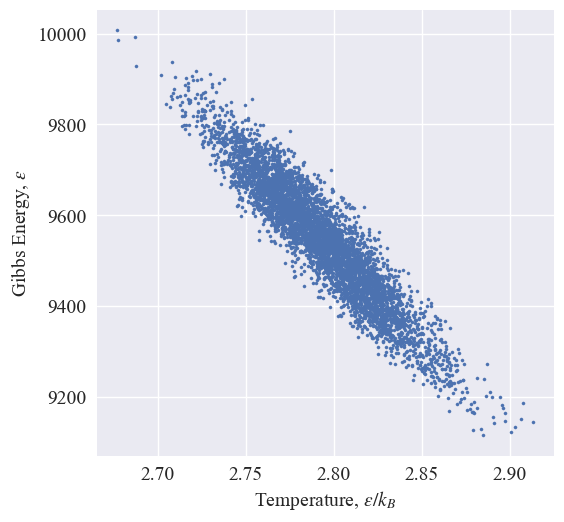

In [28]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=5);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

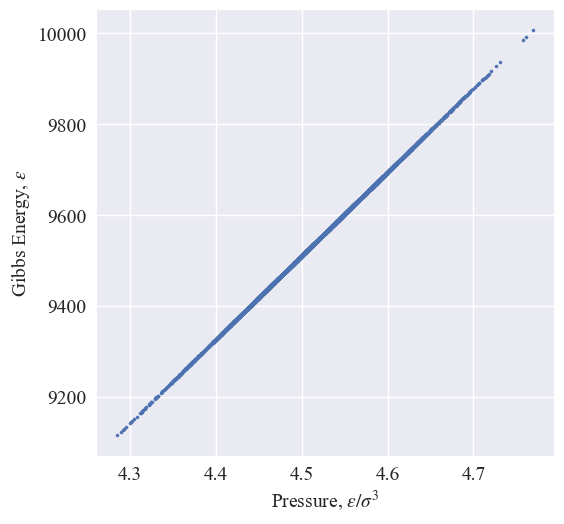

In [29]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();